In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from PIL import Image
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:


# Set the path to the directory containing your images
image_dir = 'dataset'

common_size = (64, 64)  # Adjust the size as needed

# Function to load images and labels from a directory
def load_images_and_labels(directory):
    images = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(directory)):
        print(class_name)
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
                    filepath = os.path.join(class_path, filename)
                    img = Image.open(filepath)
                    # Convert the image to grayscale
                    img = img.convert('L')
                    
                    # Resize the image to a common size
                    img = img.resize(common_size)
                    # Flatten the image into a 1D NumPy array
                    img_array = np.array(img).flatten()
                    images.append(img_array)
                    labels.append(class_label)
    return np.array(images), np.array(labels)

# Load images and labels from the specified directory
X, y = load_images_and_labels(image_dir)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

brain_mri
breast_cancer_dataset
pneumonia_dataset
retinal_scan
Skin disease_dataset


In [3]:
set(y_train)

{0, 1, 2, 3, 4}

In [4]:
# Define the classifiers
classifiers = [
    ('SVM', SVC()),
    ('Logistic Regression', LogisticRegression(max_iter=100000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())
]

SVM Accuracy: 0.9928825622775801
{0, 1, 2, 3, 4} {0, 1, 2, 3, 4}


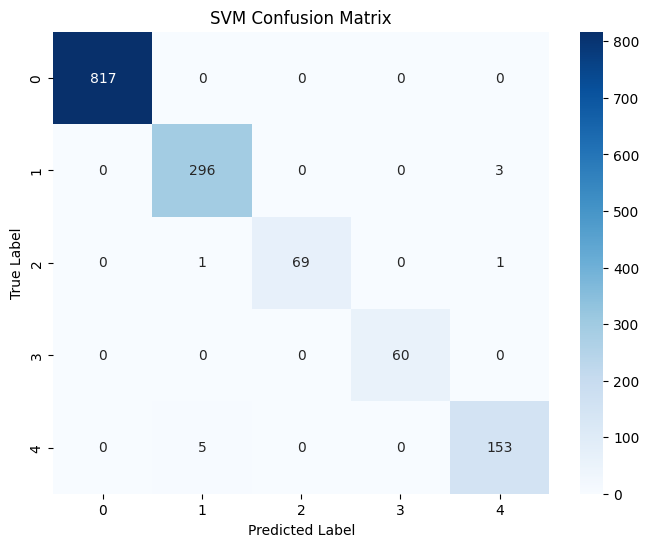

Logistic Regression Accuracy: 0.9879003558718861
{0, 1, 2, 3, 4} {0, 1, 2, 3, 4}


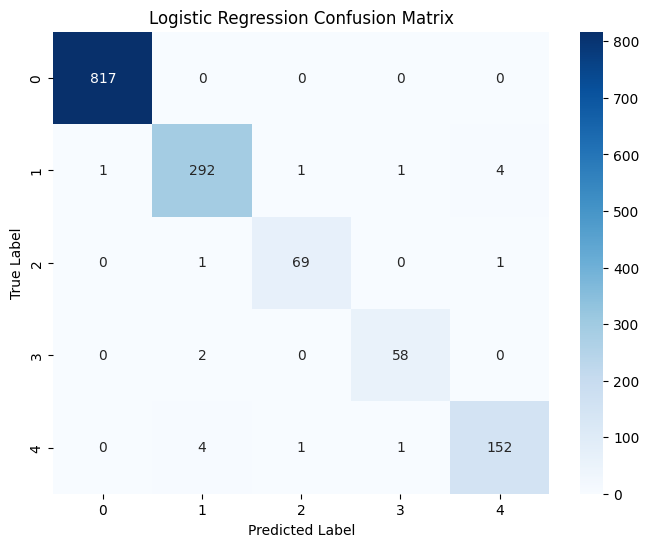

K-Nearest Neighbors Accuracy: 0.9907473309608541
{0, 1, 2, 3, 4} {0, 1, 2, 3, 4}


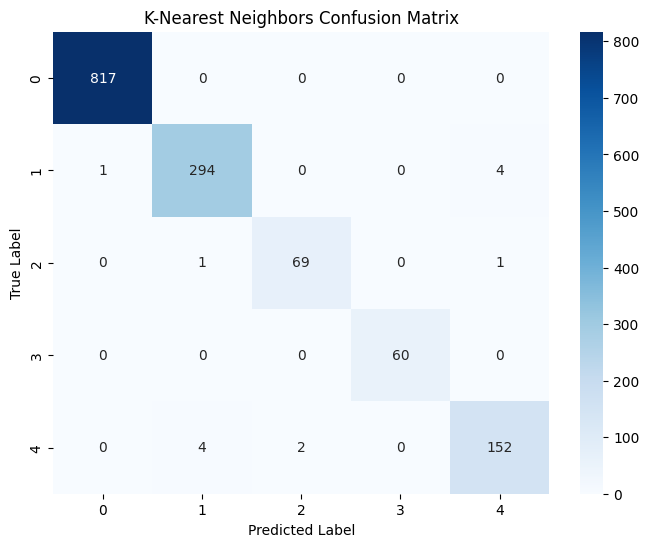

Naive Bayes Accuracy: 0.9871886120996441
{0, 1, 2, 3, 4} {0, 1, 2, 3, 4}


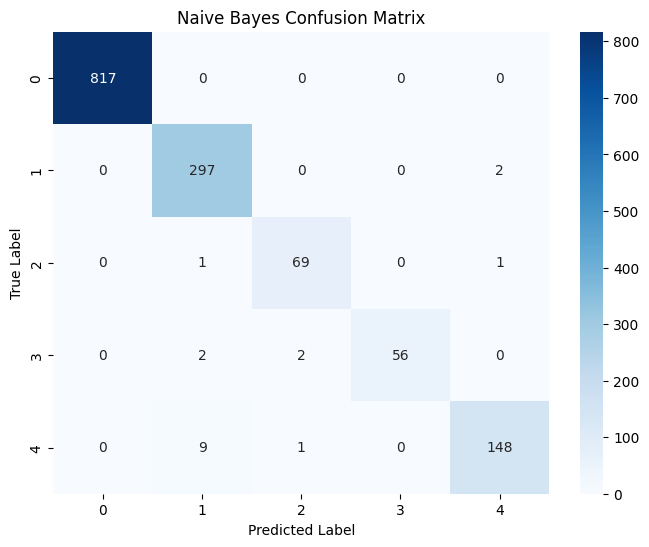

In [5]:
# Create a pipeline with PCA and classifiers
results = []
for name, classifier in classifiers:
    pipeline = Pipeline([
        ('pca', PCA(n_components=10)),
        (name, classifier)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Include the PCA model in the results
    pca_model = pipeline.named_steps['pca']

    classifier_model = pipeline.named_steps[name]
    
    results.append((name, accuracy, pca_model, classifier_model))
    print(f"{name} Accuracy: {accuracy}")


    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(set(y_test), set(y_pred))
    # Visualize the confusion matrix with Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [6]:
# Display the results
print("\nResults:")
for name, accuracy, _, _ in results:
    print(f"{name}: {accuracy}")


Results:
SVM: 0.9928825622775801
Logistic Regression: 0.9879003558718861
K-Nearest Neighbors: 0.9907473309608541
Naive Bayes: 0.9871886120996441


In [7]:
import joblib

In [8]:
final_model=results[0][3]
joblib.dump(final_model, 'model.joblib')
pca=results[0][2]
joblib.dump(pca, 'pca_model.joblib')
results[0]

('SVM', 0.9928825622775801, PCA(n_components=10), SVC())

In [9]:
def get_class_names(directory):
    class_names = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_names.append(class_name)
    return class_names

# Load class names from the specified directory
class_names = get_class_names(image_dir)
class_names

['brain_mri',
 'breast_cancer_dataset',
 'pneumonia_dataset',
 'retinal_scan',
 'Skin disease_dataset']